In [1]:
1 + 1

2

In [2]:
f(x) = x^2

f (generic function with 1 method)

In [3]:
f(1)

1

In [4]:
f(2)

4

In [5]:
f(x::Float64)=x^3

f (generic function with 2 methods)

In [6]:
f(2)

4

In [7]:
f(2.0)

8.0

In [8]:
using Random, Distributions, Statistics, Plots

In [9]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [15]:
rand(nd)

0.21360384260735057

In [16]:
sample = rand(nd, 1000)

1000-element Vector{Float64}:
 -0.4090968762392209
  0.14155303059623456
  2.35762165662837
  0.5526630330275528
 -0.034565294861038785
  0.5203493922780408
  0.6174322945134169
  2.8907211117709255
  0.14442478466952846
  0.851587922863374
 -0.042238772432396335
  0.35557885560175023
  1.3403018947022294
  ⋮
  0.6165886226767635
  0.6368297688056694
 -0.5179489305182994
  3.154118344979354
 -1.7645130350556857
 -0.27509596963999144
 -2.480890067132714
 -0.00809417056383537
 -1.1684675320136468
  0.701544073299617
  0.46519351299818784
 -1.3173453804088409

In [21]:
x_range = -3:0.01:3

-3.0:0.01:3.0

In [23]:
normal_pdf = pdf.(nd, x_range)

601-element Vector{Float64}:
 0.0044318484119380075
 0.004566589954670144
 0.004704957526933979
 0.004847032905978944
 0.004992899213612376
 0.005142640923053939
 0.00529634386531102
 0.005454095235056545
 0.005615983595990969
 0.005782098885669473
 0.005952532419775854
 0.006127376895823687
 0.0063067263962659275
 ⋮
 0.006127376895823687
 0.005952532419775854
 0.005782098885669473
 0.005615983595990969
 0.005454095235056545
 0.00529634386531102
 0.005142640923053939
 0.004992899213612376
 0.004847032905978944
 0.004704957526933979
 0.004566589954670144
 0.0044318484119380075

In [22]:
pdf(nd, 0)

0.3989422804014327

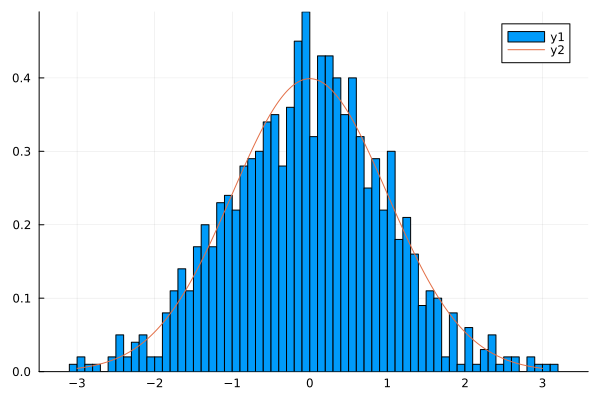

In [25]:
histogram(sample, bins=70, normed=true)
plot!(x_range,normal_pdf)

In [28]:
n = 1000
x = [0.0]
for i in 1:n
    push!(x, x[end] + rand(nd))
end


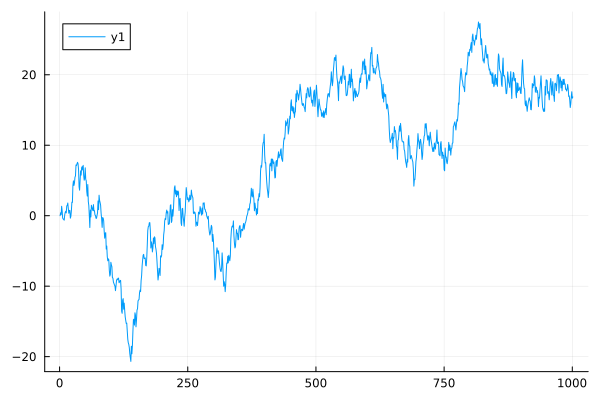

In [29]:
plot(x)

In [35]:
function random_walk(n, sigma; x0=0)
    nd = Normal(0,sigma)
    x = Float64[x0]
    for i in 1:n-1
        push!(x, x[end] + rand(nd))
    end
    return x
end

random_walk (generic function with 2 methods)

In [57]:
x = random_walk(1000,1.0)

1000-element Vector{Float64}:
   0.0
   0.2072249230090864
   0.3045308502085515
   1.3849038615925506
   1.7780337914080226
   1.6250682160229037
   0.2497290107450325
  -0.44218038685933947
  -0.6225555289327374
  -0.04544685136250082
   1.2120594804247333
   0.06045600018173891
  -0.376646386842572
   ⋮
 -19.079501801723616
 -18.935343876043106
 -18.062776344178356
 -18.169883564490977
 -17.186810340977264
 -17.59966613262593
 -17.32607945512179
 -15.401676090894501
 -15.47021241621249
 -15.34080057493386
 -13.12257844856829
 -13.887335471349846

In [52]:
nm = 1000000
n = 1000
x_mean = zeros(n)
for i in 1:nm
    x_mean = x_mean .+ random_walk(n,1).^2
end
x_mean = x_mean / nm

1000-element Vector{Float64}:
   0.0
   0.9997044776175896
   1.9981808265783254
   2.996505564995007
   3.9973651012429086
   4.996814745955628
   6.003749867351944
   7.008757854502378
   8.011467912940262
   9.011117633073898
  10.011009162702084
  11.01532208537956
  12.020898700727788
   ⋮
 988.4312210673413
 989.4939261154989
 990.4769137175575
 991.5110560986598
 992.3713744503059
 993.2814593018896
 994.2794780368187
 995.240319920665
 996.1901526538146
 997.1695875074444
 998.093842659052
 999.0604249600079

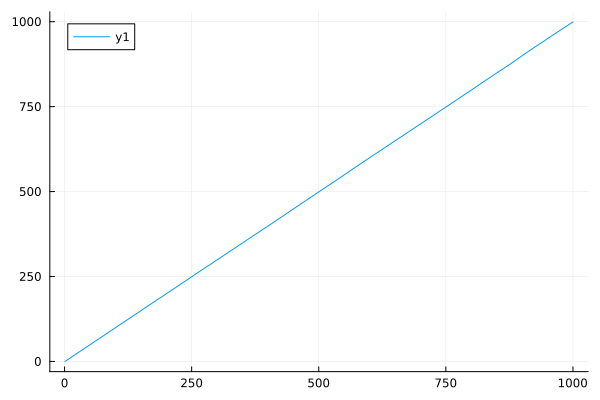

In [53]:
plot(x_mean)

In [64]:
function ou(n, sigma, k)
    nd = Normal(0,sigma)
    x = Float64[0.0]
    for i in 1:n-1
        push!(x, (1-k)*x[end] + rand(nd))
    end
    return x
end

ou (generic function with 2 methods)

In [55]:
xou = ou(1000,1)

1000-element Vector{Float64}:
  0.0
  0.7181459622332712
  1.1232700362134918
  1.6575477930097122
 -0.2634884445063701
 -0.49311453205282596
 -0.9352438673257559
 -0.4876503694774611
 -0.9693552807516992
  0.19821407307543393
 -0.24605138594015075
 -0.3954066298495639
  0.1310181472728374
  ⋮
  1.0603852443551154
  2.2712407427771364
  1.1845472554650875
  2.148098767622143
  2.904701390423852
  2.450896874372354
  2.103022404495868
  3.307291127296721
  4.153124718654223
  4.70981142702356
  5.744758846459711
  6.556654787946668

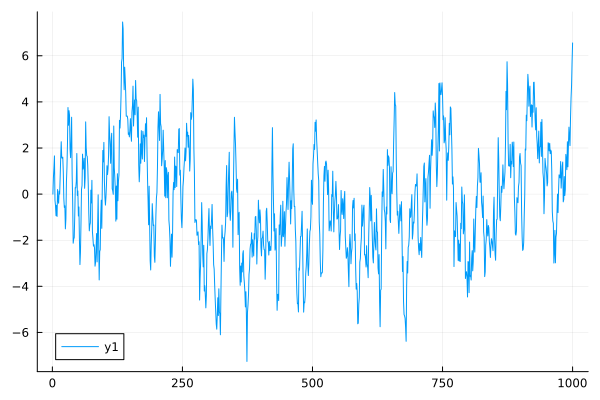

In [56]:
plot(xou)

In [61]:
x = random_walk(100,1)
x_diff = x[1:end-1] .- x[2:end]

99-element Vector{Float64}:
 -1.0739695406139838
 -0.6584459005726955
 -0.9875574072298039
 -0.06225515629664802
  1.1609595947567695
  0.6971368548690515
  0.5046662109424698
 -0.6873132439063339
 -1.2755574036951103
  3.0962071727845615
  0.8793805453199275
  0.4204606791770351
 -1.267440517689224
  ⋮
 -0.05838911125921342
  0.35681251447653395
  0.16906832759943846
 -0.5186916046550456
 -1.3173697694257918
  0.546601293919764
 -1.3247954012284051
  0.3778072823127614
 -0.3906101163810516
 -0.8326964583631358
  0.19997338527258135
 -1.0289672663357332

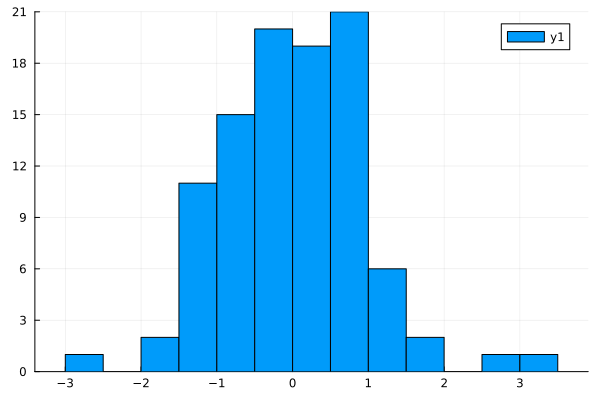

In [62]:
histogram(x_diff)

In [63]:
x_std = sqrt(sum(x_diff.^2)/99)

0.9126804320409574

In [68]:
sigma_range = 1:0.1:5

1.0:0.1:5.0

In [66]:
std_list = []
for sigma in sigma_range
    xou = ou(1000,sigma,0.1)
    push!(std_list, std(xou))
end

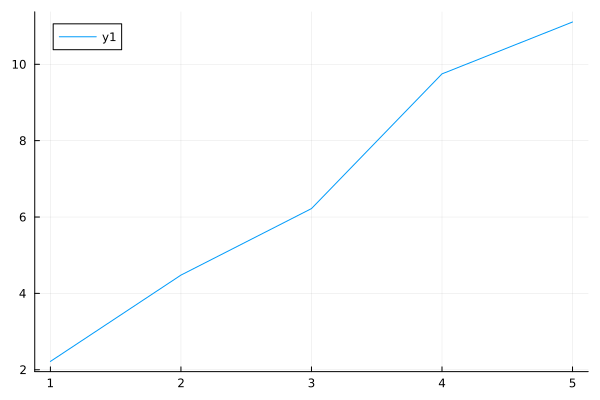

In [67]:
plot(sigma_range,std_list)

In [69]:
using Turing

In [70]:
@model function gaussian_model(data)
    μ ~ Uniform(-10,10)
    σ ~ Uniform(0.0001, 4)
    for i in 1:length(data)
        data[i] ~ Normal(μ, σ)
    end
end

gaussian_model (generic function with 2 methods)

In [72]:
data = rand(nd,100)

100-element Vector{Float64}:
  0.4321290008698898
 -0.4691534003014401
 -0.2739143760682443
 -0.3436314008283797
 -0.5196174716371585
 -0.6902466245001205
 -1.9942948529403925
  0.9077458795705124
  1.0708837178664115
 -0.31385604110653953
  0.6694940358716692
  1.1678438538688225
  0.6669281068534675
  ⋮
 -0.9568645162701618
 -0.38408125448171926
 -0.950446548226353
 -1.5755848784866362
  0.15615600272638552
 -0.6639255284957083
  1.6687300350174508
  0.42682354105883064
 -0.3115493690932308
 -0.6088013143656286
 -1.7280256405804912
 -1.7308027083969533

In [73]:
mymodel = gaussian_model(data)

DynamicPPL.Model{typeof(gaussian_model), (:data,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(gaussian_model, (data = [0.4321290008698898, -0.4691534003014401, -0.2739143760682443, -0.3436314008283797, -0.5196174716371585, -0.6902466245001205, -1.9942948529403925, 0.9077458795705124, 1.0708837178664115, -0.31385604110653953  …  -0.950446548226353, -1.5755848784866362, 0.15615600272638552, -0.6639255284957083, 1.6687300350174508, 0.42682354105883064, -0.3115493690932308, -0.6088013143656286, -1.7280256405804912, -1.7308027083969533],), NamedTuple(), DynamicPPL.DefaultContext())

In [74]:
chain = Turing.sample(mymodel, NUTS(0.65), 1000)

┌ Info: Found initial step size
└   ϵ = 0.2


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 3.35 seconds
Compute duration  = 3.35 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           μ   -0.0671    0.0944    0.0030   959.2288   676.1576    1.0011     ⋯
           σ    0.9410    0.0680    0.0025   712.6324   542.3320    1.0205     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           

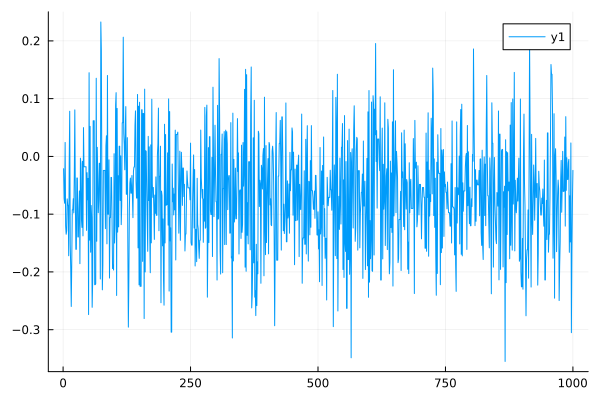

In [75]:
plot(chain[:μ])

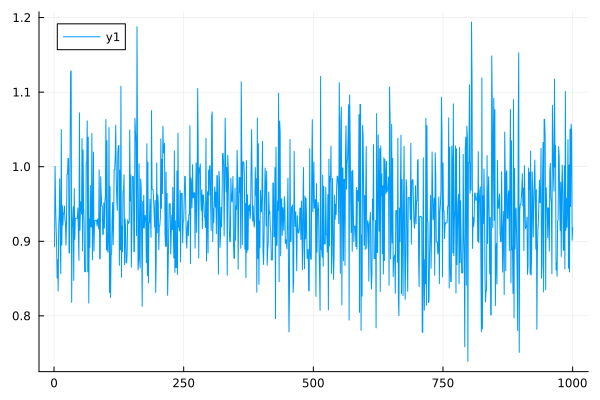

In [76]:
plot(chain[:σ])

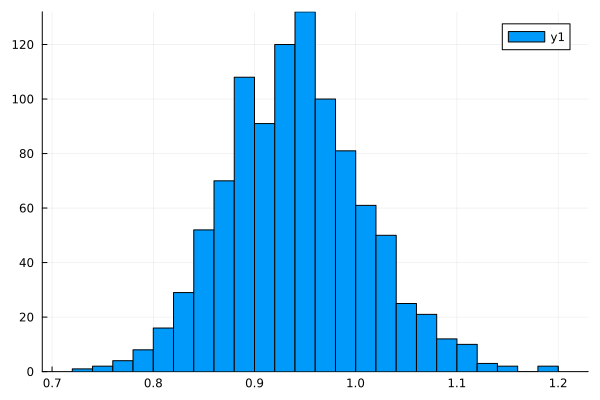

In [77]:
histogram(chain[:σ])

In [88]:
@model function ttest(sample1, sample2)
    deltamu ~ Uniform(-5,5)
    mu ~ Uniform(-10,10)
    sigma1 ~ Uniform(0.001,5)
    sigma2 ~ Uniform(0.001,5)
    for i in 1:length(sample1)
        sample1[i] ~ Normal(mu - deltamu/2, sigma1)
    end
    for i in 1:length(sample2)
        sample2[i] ~ Normal(mu + deltamu/2, sigma2)
    end
end

ttest (generic function with 2 methods)

In [83]:
data1 = rand(nd,20)
data2 = rand(Normal(0.4,1.5),30)

30-element Vector{Float64}:
  0.47935712378342726
 -0.06970992460130565
 -1.3896807295878737
  1.6656366856315183
 -1.2368275109916351
  0.4001695482203889
  5.253397853303374
  1.372070495099289
  2.2620323970086393
  0.03149368671238849
 -0.7516386975577573
  1.704642424205633
  0.9091361790795928
  ⋮
  0.5057049221057467
  0.24457173738359764
  2.2306996387518603
  1.8043513177787491
 -0.5561787635373232
  1.0027042978062508
  2.819467454208084
  1.572219701030653
  0.9431360847069771
  0.2360714110211647
 -0.6521213646881319
 -0.43106779604702405

In [89]:
mymodel = ttest(data1,data2)

DynamicPPL.Model{typeof(ttest), (:sample1, :sample2), (), (), Tuple{Vector{Float64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ttest, (sample1 = [-0.9920882504643154, 0.4016949496932113, 0.37560765897764303, -0.9154405575718298, 0.1645145008452317, -1.6394777333039425, 0.4210510482467792, 0.00783604669664041, 0.5256979028344977, -1.7999294686506884, -0.7976473563851265, 0.6300631770061547, 2.1869737571314256, 0.46436259241780625, 1.5120270261261792, -0.6612347783149306, 0.2768400204112735, 1.217236810819032, 0.6616490154145396, -1.755240955524657], sample2 = [0.47935712378342726, -0.06970992460130565, -1.3896807295878737, 1.6656366856315183, -1.2368275109916351, 0.4001695482203889, 5.253397853303374, 1.372070495099289, 2.2620323970086393, 0.03149368671238849  …  2.2306996387518603, 1.8043513177787491, -0.5561787635373232, 1.0027042978062508, 2.819467454208084, 1.572219701030653, 0.9431360847069771, 0.2360714110211647, -0.6521213646881319, -0.43106779604702405]), NamedTuple(

In [90]:
chain = Turing.sample(mymodel, NUTS(0.65), 1000)

┌ Info: Found initial step size
└   ϵ = 0.05


Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.79 seconds
Compute duration  = 0.79 seconds
parameters        = deltamu, mu, sigma1, sigma2
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk   ess_tail      rhat    ⋯
      Symbol   Float64   Float64   Float64     Float64    Float64   Float64    ⋯

     deltamu    0.6710    0.3760    0.0107   1228.6948   615.3697    1.0036    ⋯
          mu    0.3471    0.1875    0.0054   1249.0870   709.1128    1.0051    ⋯
      sigma1    1.1575    0.1959    0.0059   1088.4231   427.4493    1.0032    ⋯
      sigma2    1.5007    0.2103    0.0071    996.8290   660.1217    1.0001    ⋯
                                               

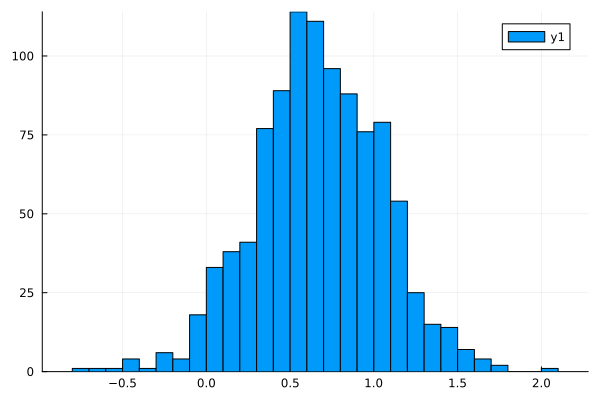

In [91]:
histogram(chain[:deltamu], bins=50)

In [92]:
function ou(n, sigma, k)
    nd = Normal(0,sigma)
    x = Float64[rand(Normal(0,sigma/sqrt(k)))]
    for i in 1:n-1
        push!(x, (1-k)*x[end] + rand(nd))
    end
    return x
end

ou (generic function with 2 methods)

In [93]:
@model function ou_model(data)
    k ~ Uniform(0.0001,1)
    σ ~ Uniform(0.0001,5)
    #data[1] ~ Normal(0, σ/sqrt(k))
    for i in 2:length(data)
        data[i] ~ Normal((1-k)*data[i-1],σ)
    end
end

ou_model (generic function with 2 methods)

In [94]:
ou_data = ou(100,1,0.1)

100-element Vector{Float64}:
  3.4701354484089957
  4.540277718863692
  2.285504638814355
  3.8445427090333215
  5.063624684652966
  4.862554407458486
  5.435994750383423
  5.97579737723507
  5.934696242079895
  5.661377954981819
  5.855211672192491
  4.223316906516982
  4.395026910893775
  ⋮
  2.240153774105665
  3.8689989434961696
  3.131251454724891
  3.683011529663989
  3.070583462869399
  2.396407017463976
  2.121490799827012
  1.6188981397724878
  0.9070676220841349
 -1.1683306250059036
 -0.9937269088969153
 -0.16739749563547612

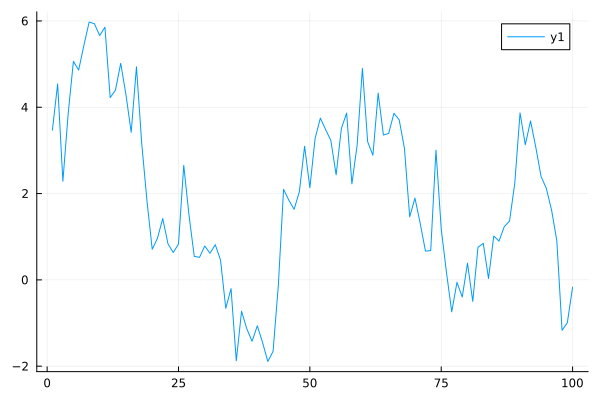

In [95]:
plot(ou_data)

In [96]:
mymodel = ou_model(ou_data)

DynamicPPL.Model{typeof(ou_model), (:data,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ou_model, (data = [3.4701354484089957, 4.540277718863692, 2.285504638814355, 3.8445427090333215, 5.063624684652966, 4.862554407458486, 5.435994750383423, 5.97579737723507, 5.934696242079895, 5.661377954981819  …  3.131251454724891, 3.683011529663989, 3.070583462869399, 2.396407017463976, 2.121490799827012, 1.6188981397724878, 0.9070676220841349, -1.1683306250059036, -0.9937269088969153, -0.16739749563547612],), NamedTuple(), DynamicPPL.DefaultContext())

In [97]:
chain = Turing.sample(mymodel, NUTS(0.65), 1000)

┌ Info: Found initial step size
└   ϵ = 0.4


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 1.3 seconds
Compute duration  = 1.3 seconds
parameters        = k, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           k    0.0704    0.0319    0.0014   485.5070   271.6488    1.0001     ⋯
           σ    0.9671    0.0663    0.0033   416.7608   559.3017    0.9992     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           k 